# **EDA**

## Load the data

In [2]:
dmv_aqi <- read.csv('../dmv-area_air-quality-data.csv')

head(dmv_aqi)

,X,city,CO_concentration,CO_aqi,NO2_concentration,NO2_aqi,O3_concentration,O3_aqi,SO2_concentration,SO2_aqi,PM2.5_concentration,PM2.5_aqi,PM10_concentration,PM10_aqi,overall_aqi,area
,<int>,<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<chr>
1,0,Washington,634.19,7,77.46,96,0.76,0,4.05,5,15.93,51,19.89,18,96,Washington D.C.
2,1,Arlington,263.69,2,9.17,11,84.40,123,3.07,4,11.68,37,12.86,11,123,Virginia
3,2,Alexandria,220.30,2,0.75,0,85.83,127,2.62,3,39.78,98,215.43,130,130,Virginia
4,3,Fairfax,580.79,6,75.40,94,2.30,1,3.55,5,15.25,49,19.79,18,94,Virginia
5,4,Rockville,447.27,5,56.21,70,14.13,11,4.41,6,10.67,34,14.02,12,70,Maryland
6,5,Bethesda,634.19,7,77.46,96,0.76,0,4.05,5,15.93,51,19.89,18,96,Maryland


In [3]:
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




## Visualize VA AQI Frequency Distribution

In [5]:
VA <- filter(dmv_aqi, area == "Virginia")
head(VA)

,X,city,CO_concentration,CO_aqi,NO2_concentration,NO2_aqi,O3_concentration,O3_aqi,SO2_concentration,SO2_aqi,PM2.5_concentration,PM2.5_aqi,PM10_concentration,PM10_aqi,overall_aqi,area
,<int>,<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<chr>
1,1,Arlington,263.69,2,9.17,11,84.40,123,3.07,4,11.68,37,12.86,11,123,Virginia
2,2,Alexandria,220.30,2,0.75,0,85.83,127,2.62,3,39.78,98,215.43,130,130,Virginia
3,3,Fairfax,580.79,6,75.40,94,2.30,1,3.55,5,15.25,49,19.79,18,94,Virginia
4,7,Reston,580.79,6,75.40,94,2.30,1,3.55,5,15.25,49,19.79,18,94,Virginia
5,44,Vienna,253.68,2,3.90,4,49.35,41,0.34,0,0.78,2,1.22,1,41,Virginia
6,45,Falls Church,634.19,7,77.46,96,0.76,0,4.05,5,15.93,51,19.89,18,96,Virginia


[1] 49

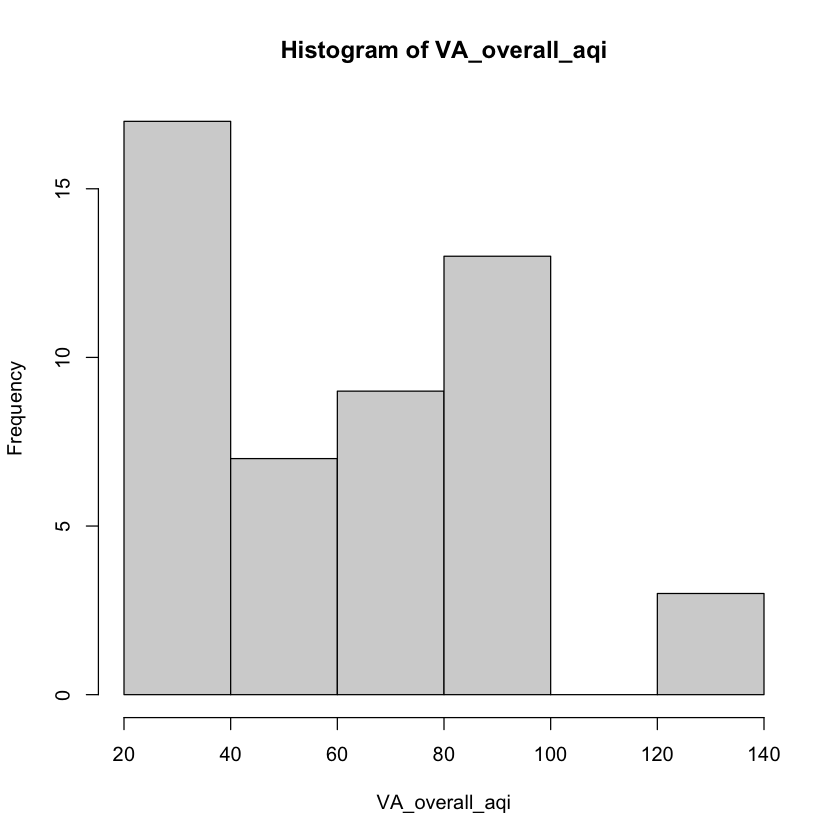

In [6]:
VA_overall_aqi <- VA$overall_aqi
hist(VA_overall_aqi) 
length(VA_overall_aqi)

From this histogram we can discern that overall aqi in VA has the highest frequency in the 20-40 range, indicating this is the most common range for air quality index values in the dataset. It appears right-skewed, with a gradual decrease in frequency from the 40-60 to the 60-80 ranges, and a few potential outliers in the 120-140 range, suggesting occasional higher air quality index readings. The overall distribution points to a trend of lower air quality index values with some infrequent higher values.

## Visualize MD AQI Frequency Distribution

In [7]:
MD <- filter(dmv_aqi, area == "Maryland")
head(MD)

,X,city,CO_concentration,CO_aqi,NO2_concentration,NO2_aqi,O3_concentration,O3_aqi,SO2_concentration,SO2_aqi,PM2.5_concentration,PM2.5_aqi,PM10_concentration,PM10_aqi,overall_aqi,area
,<int>,<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<chr>
1,4,Rockville,447.27,5,56.21,70,14.13,11,4.41,6,10.67,34,14.02,12,70,Maryland
2,5,Bethesda,634.19,7,77.46,96,0.76,0,4.05,5,15.93,51,19.89,18,96,Maryland
3,6,Silver Spring,634.19,7,77.46,96,0.76,0,4.05,5,15.93,51,19.89,18,96,Maryland
4,8,Frederick,360.49,4,21.76,27,40.05,33,1.07,1,5.54,17,7.44,6,33,Maryland
5,9,Gaithersburg,447.27,5,56.21,70,14.13,11,4.41,6,10.67,34,14.02,12,70,Maryland
6,10,Annapolis,453.95,5,40.44,50,28.61,24,5.13,7,8.39,27,13.23,12,50,Maryland


[1] 49

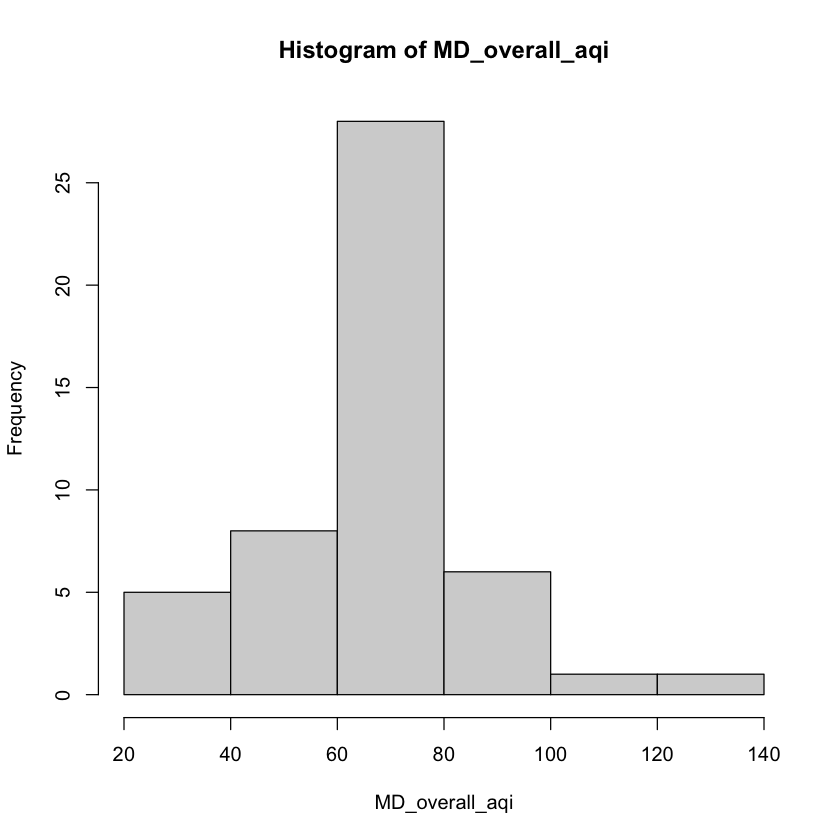

In [8]:
MD_overall_aqi <- MD$overall_aqi
hist(MD_overall_aqi) 
length(MD_overall_aqi)

The histogram for overall aqi in MD shows a distribution of air quality index values with a peak in the 60-80 range, indicating this is where the majority of data points fall, and thus the most common air quality index observed for this dataset. AQI in the ranges of 20-40 and 40-60 have lower frequencies, and there's a further decrease in the 80-100 range. The presence of data points in the 100-120 and 120-140 ranges suggests occasional higher values. The distribution is not as right-skewed as the previous histogram for VA, but it still shows a decrease in frequency as the value increases beyond the mode.

## Compare VA AQI with MD AQI

In [9]:
mean(VA_overall_aqi)
sd(VA_overall_aqi)

[1] 62.71429

[1] 29.76435

In [10]:
mean(MD_overall_aqi)
sd(MD_overall_aqi)

[1] 70.10204

[1] 21.06957

## Visualize the AQI Comparison using Boxplots

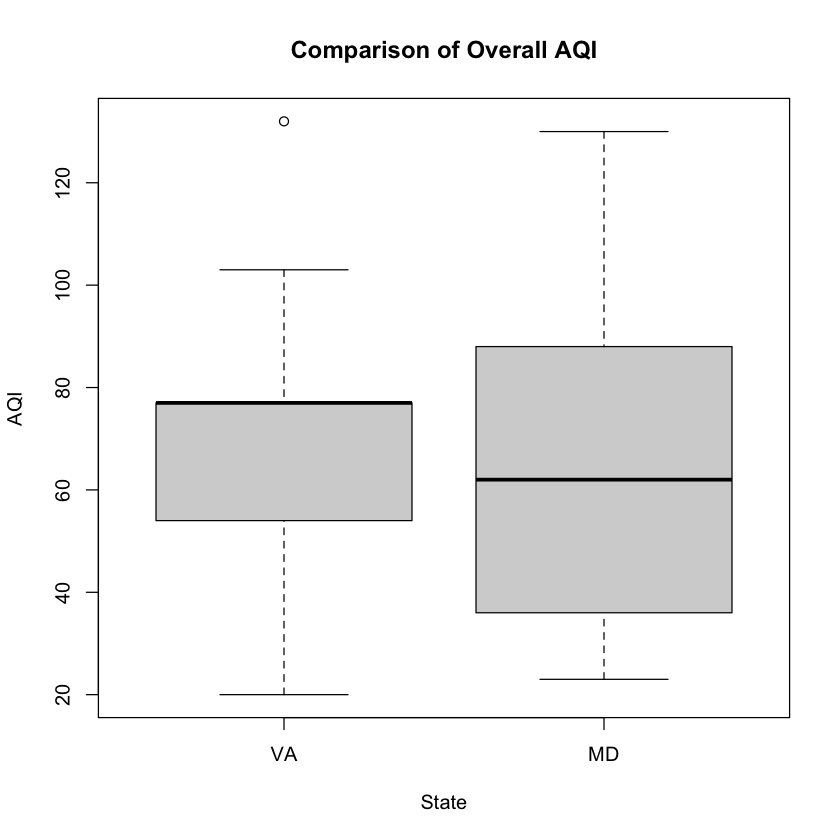

In [11]:
# Combine the datasets
combined_data <- rbind(VA, MD)

boxplot(overall_aqi ~ area, data = combined_data, 
        names = c("VA", "MD"),
        main = "Comparison of Overall AQI",
        xlab = "State",
        ylab = "AQI")

The box plot comparison indicates that Maryland has a higher median Air Quality Index (AQI) and greater variability in AQI values than Virginia, with Virginia exhibiting an outlier that indicates an occasional AQI reading significantly higher than typical values. Both states have similar symmetry around their medians, suggesting a comparable distribution shape for AQI readings.

# **Hypothesis Testing**

## **Welch Two Sample t-test**

Null Hypothesis (H0): There is no significant difference in AQI between VA and MD.

Alternative Hypothesis (H1): MD's AQI are of higher levels than VA's.

In [12]:
va_aqi <- subset(dmv_aqi, select=overall_aqi, subset=area=="Virginia", drop=T)
md_aqi <- subset(dmv_aqi, select=overall_aqi, subset=area=="Maryland", drop=T)

t.test(va_aqi, md_aqi, alt="greater")



	Welch Two Sample t-test

data:  va_aqi and md_aqi
t = -1.4181, df = 86.45, p-value = 0.9201
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -16.04956       Inf
sample estimates:
mean of x mean of y 
 62.71429  70.10204 


The Welch Two Sample t-test shows that there is not a statistically significant difference in the means of AQI between Virginia and Maryland (p-value = 0.9201), with Virginia having a slightly lower mean AQI (mean of x = 62.71429) compared to Maryland (mean of y = 70.12024).

Non-technical conclusion: The test shows that VA and MD have very similar Air Aquality Indexes. 

The 95% confidence interval for the difference in means of AQI between Virginia and Maryland is from approximately -16.04956 to infinity. This indicates that we can be 95% confident that the true difference in AQI means could be less than 0, suggesting no significant difference between the two states. Since the interval contains zero, it suggests that we cannot conclude a statistically significant difference in the AQI means of Virginia and Maryland, with the lower bound of this difference being just below zero. The "Inf" in the interval likely represents that the upper bound is not calculated or is extremely large, which typically happens when the variance in the two samples is quite different, or when the sample size is small, leading to a skewed distribution of the estimated mean difference.

## **Bootstrap Hypothesis Test**

In [13]:
va_n <- length(VA_overall_aqi)

In [14]:
md_n <- length(MD_overall_aqi)

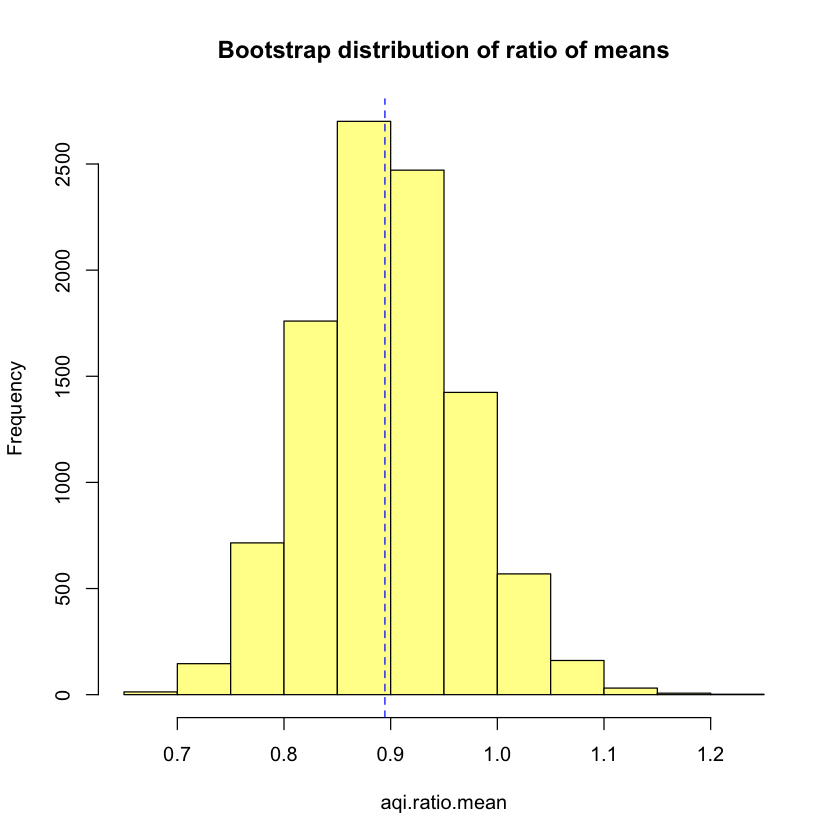

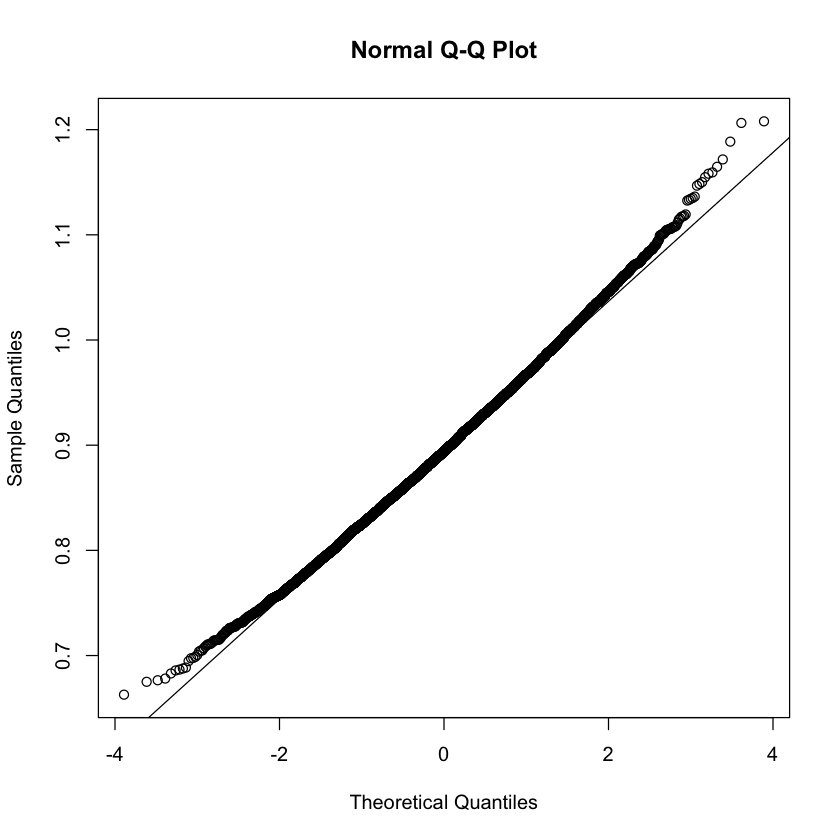

In [15]:
N <- 10000
aqi.ratio.mean <- numeric(N) 

for (i in 1:N)
{
VA.sample <- sample(VA_overall_aqi, va_n, replace = TRUE) 
MD.sample <- sample(MD_overall_aqi, md_n, replace = TRUE)
aqi.ratio.mean[i] <- mean(VA.sample) / mean(MD.sample)
}

hist(aqi.ratio.mean, main = "Bootstrap distribution of ratio of means",col = '#FFFF99')
abline(v = mean(VA_overall_aqi) / mean(MD_overall_aqi), col = "blue", lty = 2)

qqnorm(aqi.ratio.mean)
qqline(aqi.ratio.mean)

In [16]:
mean(VA_overall_aqi) / mean(MD_overall_aqi) #original sample
mean(aqi.ratio.mean) #bootstrap sample
sd(aqi.ratio.mean)

# 95% CI
quantile(aqi.ratio.mean, c(0.025, 0.975))

[1] 0.8946143

[1] 0.8961548

[1] 0.07158648

2.5%     97.5% 
0.7602382 1.0421573

Conclusion: The 95% bootstrap percentile interval for the ratio of AQI means between Virginia and Maryland is from approximately 0.7602 to 1.0421. Since this interval includes 1, it suggests that there is not a statistically significant difference between the AQI means of the two states.

In [17]:
bias= mean(aqi.ratio.mean) - (mean(VA_overall_aqi) / mean(MD_overall_aqi)) # estimated bias

cat("The bootstrap estimate of the bias for the mean ratio is: ", bias)

The bootstrap estimate of the bias for the mean ratio is:  0.001540569

The Welch Two Sample t-test and bootstrap analysis both indicate no statistically significant difference in AQI between Virginia and Maryland, with the t-test yielding a p-value of 0.9201 and the bootstrap method providing a 95% confidence interval for the ratio of means that includes 1. These results are consistent and confirm no significant difference in AQI between the two states.